## Importing Basic Libararies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # information ploting

## Importing Dataset

In [ ]:
dataset = pd.read_csv("/content/dataR2.csv")
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
y = dataset.iloc[:,-1].values
X = dataset.iloc[:,:-1]

In [ ]:
y[np.where(y == 1)] = 0 # labeled as healthy
y[np.where(y == 2)] = 1 # labeled as sick
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
X.mean(axis=0)

Age             57.301724
BMI             27.582111
Glucose         97.793103
Insulin         10.012086
HOMA             2.694988
Leptin          26.615080
Adiponectin     10.180874
Resistin        14.725966
MCP.1          534.647000
dtype: float64

### shuffle the dataset

In [ ]:
def unison_shuffle(a, b):
  # make a shuffle index array to make a fixed shuffling order for both x, y
  inx = np.random.permutation(a.shape[0])  
  return a.iloc[inx].reset_index(drop=True), b[inx]

In [ ]:
X, y = unison_shuffle(X, y)

In [ ]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799
1,67,29.606767,79,5.819,1.133929,21.9033,2.194280,4.20750,585.307
2,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949
3,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919
4,43,26.562500,101,10.555,2.629602,9.8000,6.420295,16.10000,806.724
...,...,...,...,...,...,...,...,...,...
111,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973
112,32,36.512637,87,14.026,3.009980,49.3727,5.100000,17.10223,588.460
113,25,22.860000,82,4.090,0.827271,20.4500,23.670000,5.14000,313.730
114,49,21.367521,78,2.640,0.507936,6.3339,3.886145,22.94254,737.672


## Feature Engineering

Heatmap

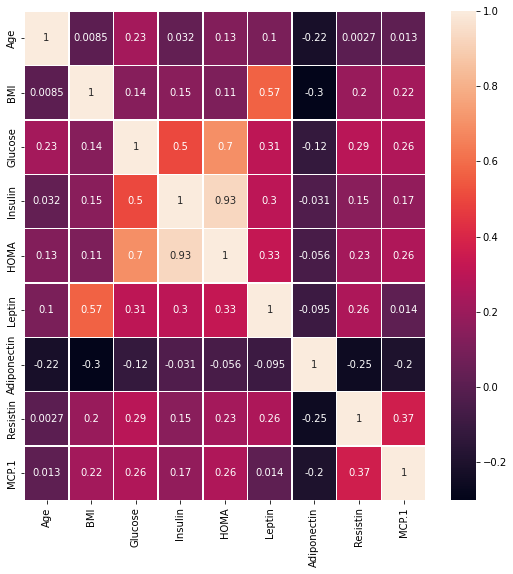

In [ ]:
from seaborn import heatmap

plt.figure(figsize=(9,9))
heatmap(X.corr(), linewidth=0.5, annot=True);

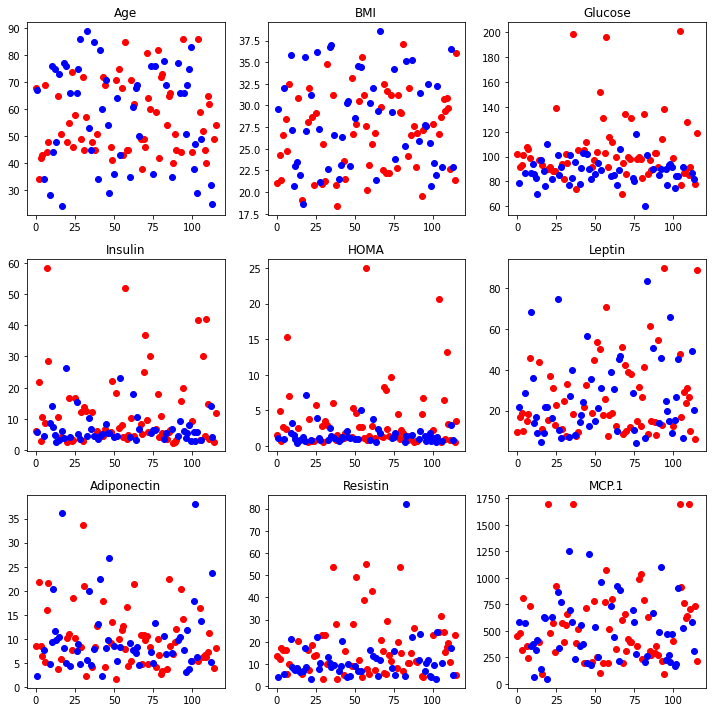

In [ ]:
fig = plt.figure(figsize=(10,10))

for index, feature in enumerate(X,1):
    plt.subplot(3, 3, index)
    plt.scatter(np.arange(116)[y==1], X[feature][y==1], c='r')
    plt.scatter(np.arange(116)[y==0], X[feature][y==0], c='b')
    plt.title(feature)
    
fig.tight_layout()
plt.show()

again, we can not surely rely on these distributions, excepts for the colinearality of HOMA and Insulin features 

## Models Prediction


1. SVC(RBF Kernel)
2. SVC(Linear Kernel)
3. Decision Tree
4. KNN


for each of the models we'll use GridSearch hyperparameter tuning on 5-fold crossvalidation

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### train/validation split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=1)

### SVC( RBF Kernel )

In [ ]:
rbf_tuning_parameters = [{'kernel': ['rbf'], 
                       'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                       'C': [1, 10, 100, 1000]}]

rbf_svm_clf = GridSearchCV(SVC(), rbf_tuning_parameters, cv=5)

In [ ]:
rbf_svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [ ]:
print(rbf_svm_clf.best_params_)

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}


In [ ]:
y_pred_rbf_clf = rbf_svm_clf.predict(X_test)
print(classification_report(y_test, y_pred_rbf_clf))
print(accuracy_score(y_test, y_pred_rbf_clf))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.90      0.64      0.75        14

    accuracy                           0.75        24
   macro avg       0.77      0.77      0.75        24
weighted avg       0.79      0.75      0.75        24

0.75


In [ ]:
import joblib

joblib.dump( rbf_svm_clf , 'bloodmodelRBF') 

['bloodmodelRBF']

In [ ]:
rbf_svm_clf.predict([[45, 21.3, 102, 13.8, 3.4, 7.6, 21, 23, 552]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([1])